# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

# Data loading

In [2]:
df = pd.read_csv("iris.data")
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [3]:
df.shape

(149, 5)

In [4]:
df.columns

Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')

In [5]:
columns = ['sepal_length','sepal_width', 'petal_length', 'petal_width', 'class']

In [6]:
df.columns = columns
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   class         149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [32]:
df.tail(10)

,sepal_length,sepal_width,petal_length,petal_width,class
139,6.7,3.1,5.6,2.4,Iris-virginica
140,6.9,3.1,5.1,2.3,Iris-virginica
141,5.8,2.7,5.1,1.9,Iris-virginica
142,6.8,3.2,5.9,2.3,Iris-virginica
143,6.7,3.3,5.7,2.5,Iris-virginica
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


In [33]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,class
117,7.7,2.6,6.9,2.3,Iris-virginica
24,5.0,3.0,1.6,0.2,Iris-setosa
51,6.9,3.1,4.9,1.5,Iris-versicolor
82,6.0,2.7,5.1,1.6,Iris-versicolor
7,4.4,2.9,1.4,0.2,Iris-setosa
121,7.7,2.8,6.7,2.0,Iris-virginica
132,6.3,2.8,5.1,1.5,Iris-virginica
20,5.1,3.7,1.5,0.4,Iris-setosa
92,5.0,2.3,3.3,1.0,Iris-versicolor
123,6.7,3.3,5.7,2.1,Iris-virginica


# Missing Values

In [9]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

# Visualization


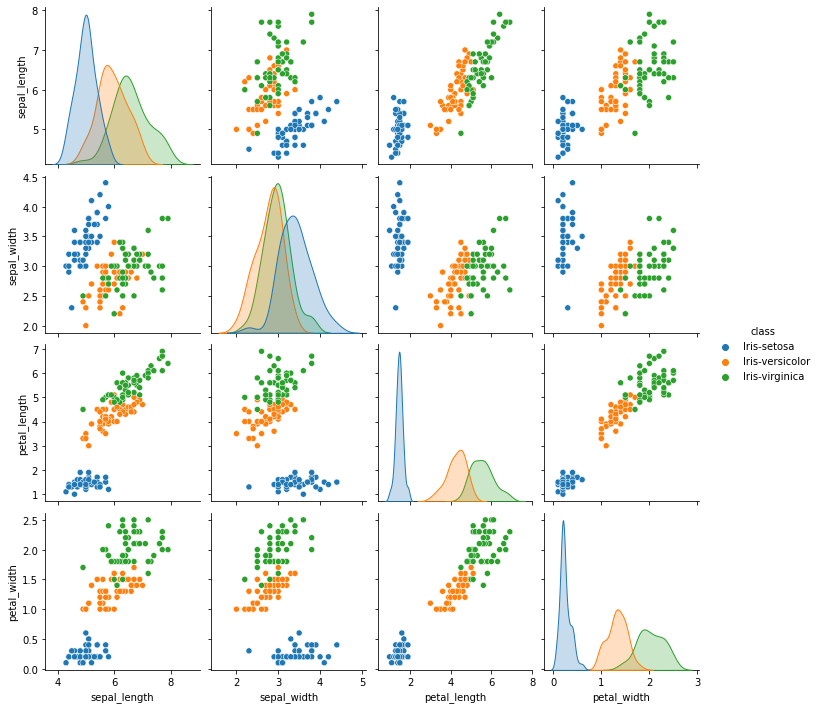

In [11]:
sns.pairplot(df, hue = "class")
plt.show()


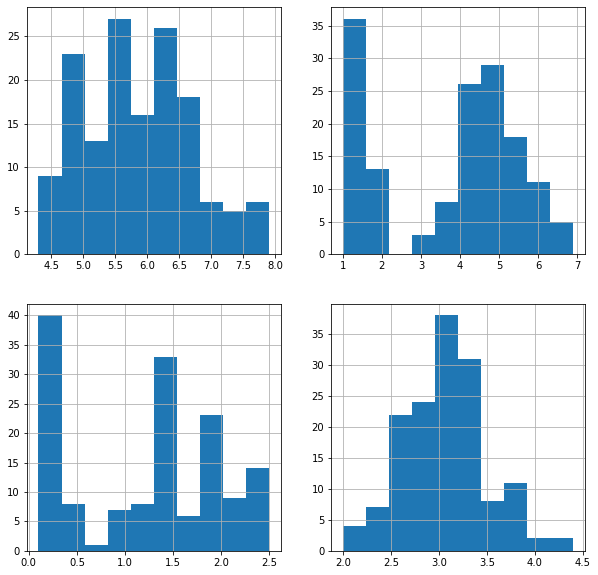

In [12]:
def histplots():
    fig,axes=plt.subplots(2,2,figsize=(10,10))
    df['sepal_length'].hist(ax=axes[0][0])
    df['petal_length'].hist(ax=axes[0][1])
    df['petal_width'].hist(ax=axes[1][0])
    df['sepal_width'].hist(ax=axes[1][1])
    plt.show()
    
histplots()

# Correlation


In [13]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.103784,0.871283,0.816971
sepal_width,-0.103784,1.000000,-0.415218,-0.350733
petal_length,0.871283,-0.415218,1.000000,0.962314
petal_width,0.816971,-0.350733,0.962314,1.000000


<AxesSubplot:>

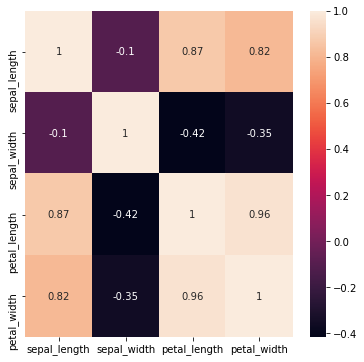

In [18]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(corr, annot=True, ax=ax)

# Encoding variables

In [19]:
from sklearn.preprocessing import LabelEncoder
X = df.drop(['class'], 1)
y = df['class']
le = LabelEncoder()
y = le.fit_transform(y)


# Splitting dataset into training and test set

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

# Selecting the model

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [54]:
LR = LogisticRegression()
KNN = KNeighborsClassifier()
DT = DecisionTreeClassifier()


# Training and Evaluating the Models

In [55]:
model1 = LogisticRegression()

model1.fit(X_train,y_train)

sc_LR = round(model1.score(X_test, y_test) * 100,2)

print("Accuracy: ", str(sc_LR) ,  " %")

Accuracy:  91.11  %


In [57]:

model2 = KNeighborsClassifier()

model2.fit(X_train,y_train)

sc_KNN = round(model2.score(X_test, y_test) * 100,2)

print("Accuracy: ", str(sc_KNN) , " %")

Accuracy:  93.33  %


In [52]:
model3 = DecisionTreeClassifier()

model3.fit(X_train, y_train)

sc_DT= round(model3.score(X_test, y_test) * 100 , 2)

print("Accuracy: ", str(sc_DT) , "%")

Accuracy:  88.89 %
